In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

In [27]:
import sys
in_colab = 'google.colab' in sys.modules

if in_colab:
  BASE_DIR = "https://github.com/DiploDatos/AnalisisYCuracion/raw/master/"
else:
  BASE_DIR = ".."

In [3]:
tabla_1 = pd.read_csv(BASE_DIR + "/input/wtageinf.csv")
tabla_1.head(10)

,Sex,Agemos,L,M,S,P3,P5,P10,P25,P50,P75,P90,P95,P97
0,1,0.0,1.815151,3.530203,0.152385,2.355451,2.526904,2.773802,3.150611,3.530203,3.879077,4.172493,4.340293,4.446488
1,1,0.5,1.547523,4.003106,0.146025,2.799549,2.964656,3.209510,3.597396,4.003106,4.387423,4.718161,4.910130,5.032625
2,1,1.5,1.068796,4.879525,0.136479,3.614688,3.774849,4.020561,4.428873,4.879525,5.327328,5.728153,5.967102,6.121929
3,1,2.5,0.695974,5.672889,0.129678,4.342341,4.503255,4.754479,5.183378,5.672889,6.175598,6.638979,6.921119,7.106250
4,1,3.5,0.419815,6.391392,0.124717,4.992898,5.157412,5.416803,5.866806,6.391392,6.942217,7.460702,7.781401,7.993878
5,1,4.5,0.219867,7.041836,0.121040,5.575169,5.744752,6.013716,6.484969,7.041836,7.635323,8.202193,8.556813,8.793444
6,1,5.5,0.077506,7.630425,0.118271,6.096775,6.272175,6.551379,7.043627,7.630425,8.262033,8.871384,9.255615,9.513307
7,1,6.5,-0.021908,8.162951,0.116154,6.564430,6.745993,7.035656,7.548346,8.162951,8.828786,9.475466,9.885436,10.161350
8,1,7.5,-0.089441,8.644832,0.114510,6.984123,7.171952,7.472021,8.004399,8.644832,9.341490,10.021014,10.453314,10.744924
9,1,8.5,-0.133409,9.081120,0.113217,7.361236,7.555287,7.865533,8.416719,9.081120,9.805593,10.514064,10.965736,11.270838


In [4]:
tabla_1.dtypes

Sex         int64
Agemos    float64
L         float64
M         float64
S         float64
P3        float64
P5        float64
P10       float64
P25       float64
P50       float64
P75       float64
P90       float64
P95       float64
P97       float64
dtype: object

In [5]:
tabla_1.columns

Index(['Sex', 'Agemos', 'L', 'M', 'S', 'P3', 'P5', 'P10', 'P25', 'P50', 'P75',
       'P90', 'P95', 'P97'],
      dtype='object')

### Ejercicio 1: Tablas de Crecimiento

Graficar las curvas correspondientes a cada percentil para niños y niñas.
a.En la columna Sex, 1 representa a niños y 2 a niñas
b.Las curvas de los percentiles correspondientes a un mismo sexo deben ir en un mismo gráfico.
c.Un gráfico para cada sexo.

In [6]:
def graficar_tablas_de_pesos( dataset, titulo_grafico ):
    
    plt.figure(figsize=(10,6))
    
    p = "P3"
    sns.lineplot (data=dataset, x='Agemos', y=p,label=p)
    p = "P5"
    sns.lineplot (data=dataset, x='Agemos', y=p,label=p)
    p = "P10"
    sns.lineplot (data=dataset, x='Agemos', y=p,label=p)
    p = "P25"
    sns.lineplot (data=dataset, x='Agemos', y=p,label=p)
    p = "P50"
    sns.lineplot (data=dataset, x='Agemos', y=p,label=p)
    p = "P75"
    sns.lineplot (data=dataset, x='Agemos', y=p,label=p)
    p = "P90"
    sns.lineplot (data=dataset, x='Agemos', y=p,label=p)
    p = "P95"
    sns.lineplot (data=dataset, x='Agemos', y=p,label=p)
    p = "P97"
    sns.lineplot (data=dataset, x='Agemos', y=p,label=p)

    plt.suptitle(titulo_grafico)
    plt.ylabel("Peso")
    plt.xlabel("Edad en mes")
    plt.show()

    return


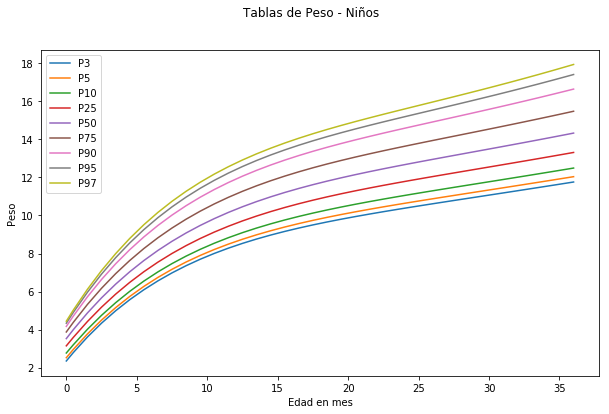

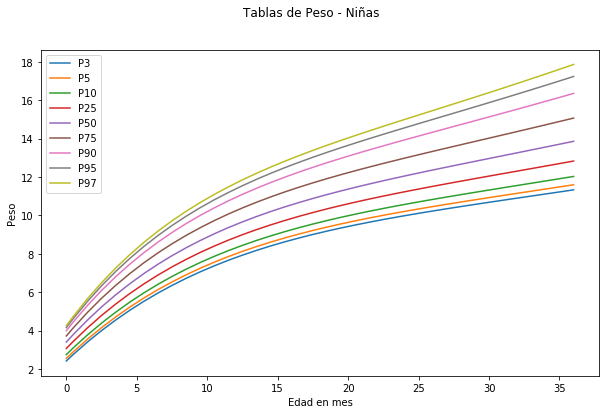

In [7]:
ds_ninos=tabla_1.query("Sex==1")
graficar_tablas_de_pesos( ds_ninos, "Tablas de Peso - Niños")

ds_ninas=tabla_1.query("Sex==2")
graficar_tablas_de_pesos( ds_ninas, "Tablas de Peso - Niñas")



¿Son distintas las graficas? Parecen iguales. Verifiquemos los percentiles.

In [8]:
np.percentile(ds_ninos,[3,5,10,25])

array([-0.17928654, -0.15332943,  0.1101541 ,  4.00310642])

In [9]:
np.percentile(ds_ninas,[3,5,10,25])

array([-0.60285644, -0.00435822,  0.11414007,  3.79068571])

### Ejercicio 2: Pasos Fronterizos

1.Descargar dataset en JSON:Pasos Fronterizos
2.Graficar un histograma agrupando por valor del atributo “province”.

In [10]:
df_pasos = pd.read_json(BASE_DIR + "/input/pasos.json")
df_pasos.dtypes

location    object
name        object
province    object
dtype: object

In [11]:
df_pasos[:15]

,location,name,province
0,"[-54.832543, -68.3712885]",SAN SEBASTIAN ( USHUAIA ),Tierra del Fuego
1,"[-54.8249379, -68.3258626]",AERO PUBLICO DE USHUAIA,Tierra del Fuego
2,"[-54.8096728, -68.3114748]",PUERTO USHUAIA (PREFECTURA),Tierra del Fuego
3,"[-54.8019121, -68.3029511]",PUERTO USHUAIA,Tierra del Fuego
4,"[-51.6896359, -72.2993574]",PASO LAURITA CASAS VIEJAS,Santa Cruz
5,"[-51.5866042, -72.3649779]",PASO DOROTEA,Santa Cruz
6,"[-51.2544488, -72.2652242]",PASO RIO DON GUILLERMO,Santa Cruz
7,"[-53.3229179, -68.6063227]",PASO SAN SEBASTIAN,Tierra del Fuego
8,"[-53.78438, -67.7173342]",TERMINAL RIO GRANDE,Tierra del Fuego
9,"[-53.7860374, -67.7002243]",PUERTO RIO GRANDE,Tierra del Fuego


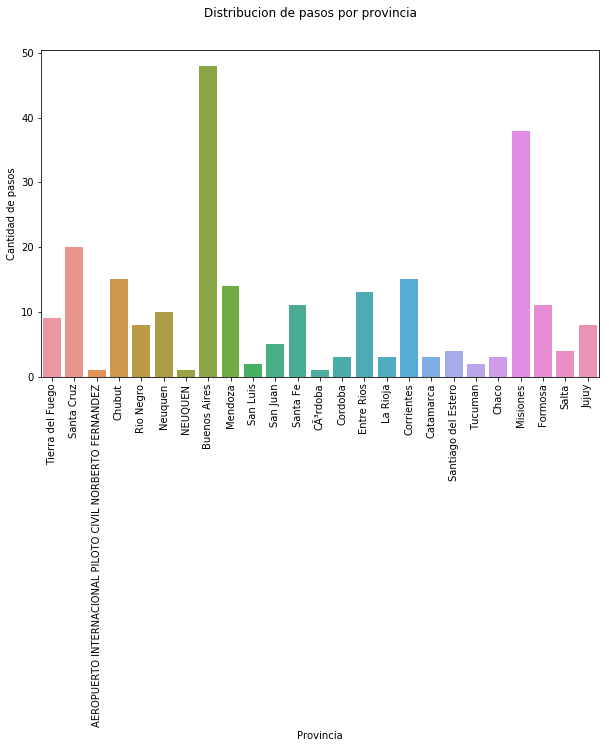

In [12]:
plt.figure(figsize=(10,6))

sns.countplot ( data=df_pasos, x='province', label='Provincia' )

plt.suptitle("Distribucion de pasos por provincia")
plt.ylabel("Cantidad de pasos")
plt.xlabel("Provincia")
plt.xticks(rotation='vertical')
plt.show()


Hay que limpiar nombres de provincias...

In [13]:
df_pasos.province.unique()

array(['Tierra del Fuego', 'Santa Cruz',
       'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
       'Chubut', 'Rio Negro', 'Neuquen', 'NEUQUEN', 'Buenos Aires',
       'Mendoza', 'San Luis', 'San Juan', 'Santa Fe', 'CÃ³rdoba',
       'Cordoba', 'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

Corregir casos caracteres especiales

In [14]:
df_pasos [ df_pasos['province'] == "CÃ³rdoba" ]['province']

119    CÃ³rdoba
Name: province, dtype: object

In [15]:
df_pasos['province'] = df_pasos['province'].replace(['CÃ³rdoba'],'Cordoba')


In [16]:
df_pasos.province.unique()

array(['Tierra del Fuego', 'Santa Cruz',
       'AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ',
       'Chubut', 'Rio Negro', 'Neuquen', 'NEUQUEN', 'Buenos Aires',
       'Mendoza', 'San Luis', 'San Juan', 'Santa Fe', 'Cordoba',
       'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

In [17]:
df_pasos [ df_pasos['province'] == "Cordoba" ]

,location,name,province
119,"[-36.5938265, -64.2811118]",AERO SANTA ROSA,Cordoba
122,"[-31.3154367, -64.2145085]",AERO CORDOBA,Cordoba
125,"[-31.3154367, -64.2145085]",AERO CORDOBA,Cordoba
126,"[-32.3683712, -70.2314398]",PASO VALLE HERMOSO,Cordoba


Corregir datos erroneos en campo __province__

In [18]:
df_pasos [ df_pasos['province'] == "AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ" ]

,location,name,province
15,"[-51.6117879, -69.3085038]",AERO RIO GALLEGOS,AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO...


In [19]:
df_pasos['province'] = df_pasos['province'].replace(['AEROPUERTO INTERNACIONAL PILOTO CIVIL NORBERTO FERNANDEZ'],'Santa Cruz')

In [20]:
df_pasos.province.unique()

array(['Tierra del Fuego', 'Santa Cruz', 'Chubut', 'Rio Negro', 'Neuquen',
       'NEUQUEN', 'Buenos Aires', 'Mendoza', 'San Luis', 'San Juan',
       'Santa Fe', 'Cordoba', 'Entre Rios', 'La Rioja', 'Corrientes',
       'Catamarca', 'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones',
       'Formosa', 'Salta', 'Jujuy'], dtype=object)

In [21]:
Unificar nombres de provincias

SyntaxError: invalid syntax (<ipython-input-21-96562c3d1c82>, line 1)

In [22]:
df_pasos['province'] = df_pasos['province'].replace(['NEUQUEN'],'Neuquen')

In [23]:
df_pasos.province.unique()

array(['Tierra del Fuego', 'Santa Cruz', 'Chubut', 'Rio Negro', 'Neuquen',
       'Buenos Aires', 'Mendoza', 'San Luis', 'San Juan', 'Santa Fe',
       'Cordoba', 'Entre Rios', 'La Rioja', 'Corrientes', 'Catamarca',
       'Santiago del Estero', 'Tucuman', 'Chaco', 'Misiones', 'Formosa',
       'Salta', 'Jujuy'], dtype=object)

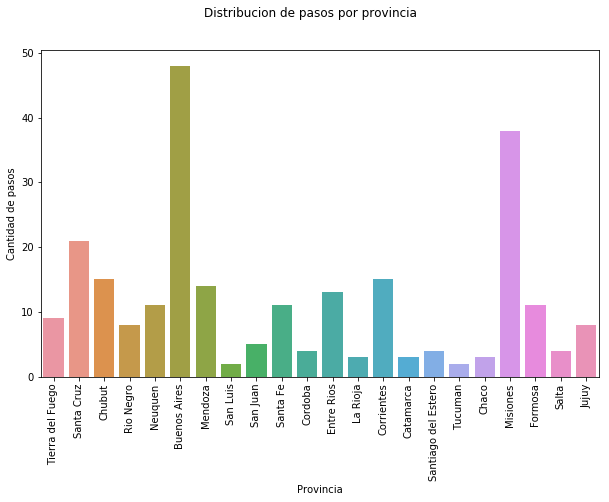

In [24]:
plt.figure(figsize=(10,6))

sns.countplot ( data=df_pasos, x='province', label='Provincia' )

plt.suptitle("Distribucion de pasos por provincia")
plt.ylabel("Cantidad de pasos")
plt.xlabel("Provincia")
plt.xticks(rotation='vertical')
plt.show()


Jugamos un poco con el encoding de los archivos...

In [29]:
# helpful character encoding module
import chardet
import string

df_pasos = pd.read_json(BASE_DIR + "/input/pasos.json")
# look at the first ten thousand bytes to guess the character encoding
with open(BASE_DIR + "/input/pasos.json", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
result

{'confidence': 0.7525, 'encoding': 'utf-8', 'language': ''}

In [30]:
tabla_1 = pd.read_csv(BASE_DIR + "/input/wtageinf.csv")
# look at the first ten thousand bytes to guess the character encoding
with open(BASE_DIR + "/input/wtageinf.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read(10000))

# check what the character encoding might be
result

{'confidence': 1.0, 'encoding': 'ascii', 'language': ''}